In [3]:
import wandb
run = wandb.init()
artifact = run.use_artifact('lcruz1-university-of-alberta/BBI_reproduction/q_values_seed_16:v0', type='model')
artifact_dir = artifact.download()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: lcruz1 (lcruz1-university-of-alberta). Use `wandb login --relogin` to force relogin


wandb:   1 of 1 files downloaded.  


In [4]:
import numpy as np

q_values = np.load('artifacts/q_values_seed_16:v0/q_values_seed_16.npz')['q_values']

In [5]:
# positions x intensities x prize_indicator x actions

q_values.shape

(11, 3, 4, 2)

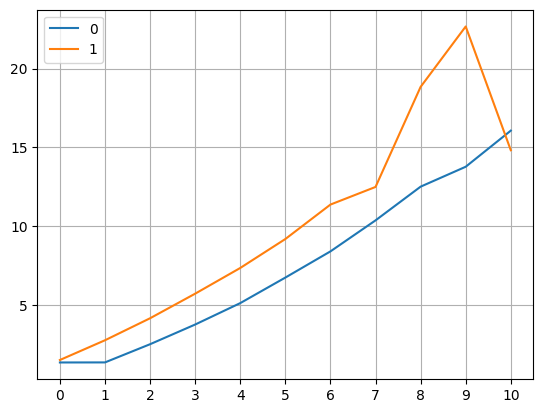

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(q_values[:, :1, :1, :].reshape(11,2)).plot(grid=True, xticks=range(11))
plt.show()

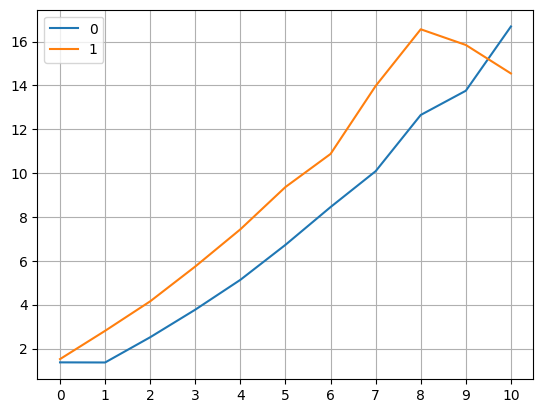

In [8]:
# positions x intensities x prize_indicator x actions

pd.DataFrame(q_values[:, 1:2, :1, :].reshape(11,2)).plot(grid=True, xticks=range(11))
plt.show()

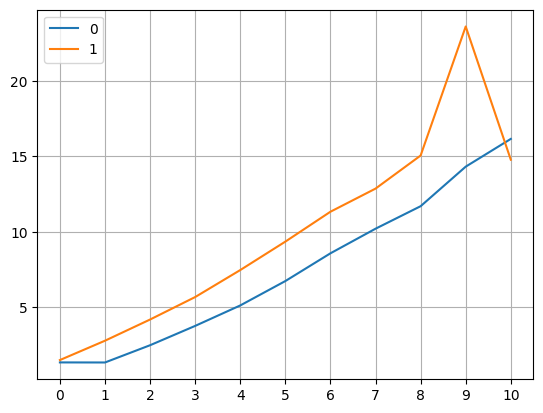

In [9]:
# positions x intensities x prize_indicator x actions

pd.DataFrame(q_values[:, 2:3, :1, :].reshape(11,2)).plot(grid=True, xticks=range(11))
plt.show()

In [10]:
# positions x intensities x prize_indicator x actions

q_values

array([[[[ 1.36468258,  1.52159011],
         [ 0.        ,  0.        ],
         [ 0.        ,  0.        ],
         [ 0.        ,  0.        ]],

        [[ 1.36859683,  1.51770032],
         [ 0.        ,  0.        ],
         [ 0.        ,  0.        ],
         [ 0.        ,  0.        ]],

        [[ 1.36284509,  1.51908757],
         [ 0.        ,  0.        ],
         [ 0.        ,  0.        ],
         [ 0.        ,  0.        ]]],


       [[[ 1.36910373,  2.77309574],
         [ 0.        ,  0.        ],
         [ 0.        ,  0.        ],
         [ 0.        ,  0.        ]],

        [[ 1.36364015,  2.80776767],
         [ 0.        ,  0.        ],
         [ 0.        ,  0.        ],
         [ 0.        ,  0.        ]],

        [[ 1.35882119,  2.800222  ],
         [ 0.        ,  0.        ],
         [ 0.        ,  0.        ],
         [ 0.        ,  0.        ]]],


       [[[ 2.52251063,  4.16799498],
         [ 0.        ,  0.        ],
         [ 0.        ,

In [1]:
from src.environments.goright import GoRightEnv

In [2]:
env = GoRightEnv(seed=10)

In [3]:
env.reset()

(array([0, 0, 0, 0]), {})

In [4]:
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)

(array([9, 0, 0, 0]), -1, False, False, {})

In [24]:
env.step(0)

(array([ 9, 10,  0,  0]), 0, False, False, {})

In [15]:
env.step(0)

(array([9, 0, 0, 0]), 0, False, False, {})

In [28]:
from src.environments.goright import GoRightEnv
from src.agents.q_learning import QLearning

base_env = GoRightEnv(seed=42)
agent = QLearning(learning_rate=0.05, env_action_space=base_env.action_space)

In [29]:
obs, info = base_env.reset()

In [42]:
print(obs)
action = agent.get_action(obs, greedy=False)
print(action)
next_obs, reward, terminated, truncated, info = base_env.step(action)
print(next_obs, reward)
obs=next_obs

[ 3 10  0  0]
0
[2 5 0 0] 0


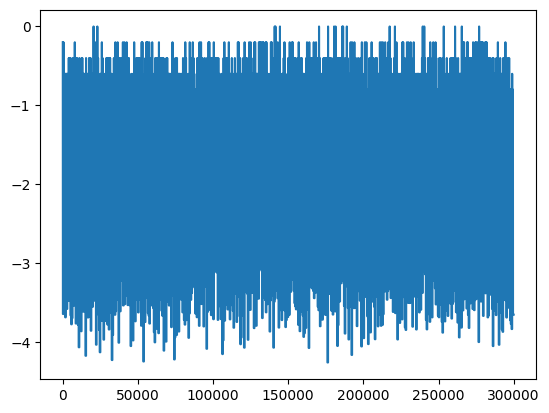

In [20]:
return_dict = np.load
returns_over_time = np.zeros((training_loops, n_steps))

for seed in np.arange(5):
    returns_over_time += return_dict[seed]["returns_over_time"]

returns_over_time /= 5

pd.Series(returns_over_time.flatten()).plot()
plt.show()